<a href="https://colab.research.google.com/github/stevengregori92/Learn-XGBoost/blob/main/StudentPerformance_with_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.0 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=e1d9d674f7b62757ba337d34237708129c2679c971acd56976605e81adee28b2
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=bad41e8cd7f95e18073a449e969520cb6ab16a421e2a0b099976cbccdefa402f
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

#Import Dataset

In [3]:
!gdown https://drive.google.com/uc?id=1E6Rw_q5bRJBdxNAHLOtQMuDc5jpPc8j_

Downloading...
From: https://drive.google.com/uc?id=1E6Rw_q5bRJBdxNAHLOtQMuDc5jpPc8j_
To: /content/studentperform.zip
100% 49.7k/49.7k [00:00<00:00, 68.4MB/s]


In [4]:
!unzip /content/studentperform.zip

Archive:  /content/studentperform.zip
  inflating: Student_Performance.csv  


In [6]:
df = pd.read_csv('Student_Performance.csv')
pd.options.display.max_columns=50
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


#Cleaning Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,missing_value,%
Hours Studied,0,0.0
Previous Scores,0,0.0
Extracurricular Activities,0,0.0
Sleep Hours,0,0.0
Sample Question Papers Practiced,0,0.0
Performance Index,0,0.0


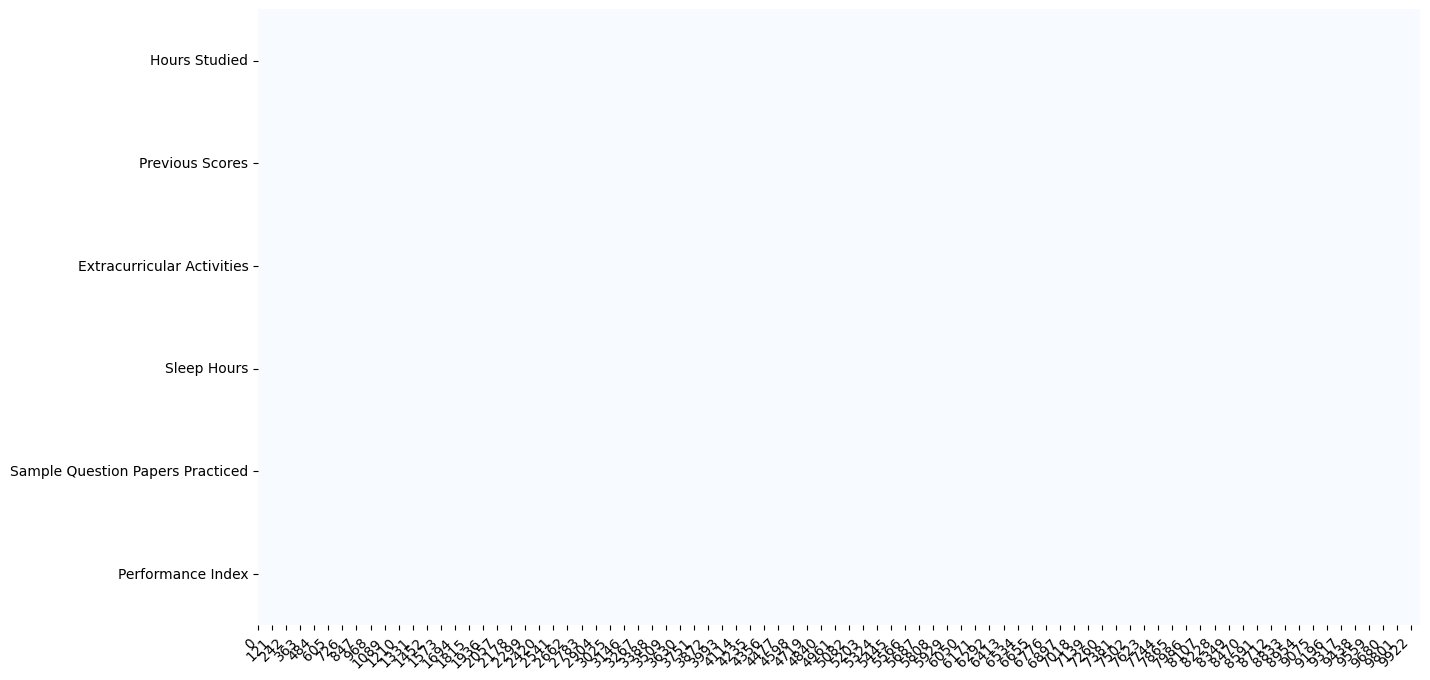

In [9]:
plot_missing_value(df, return_df=True)

In [10]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [11]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace(['No', 'Yes'], [0,1])

#Dataset Splitting

In [12]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

#Training

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA().fit(X_train)

Text(0, 0.5, 'Cumulative Explained Variance')

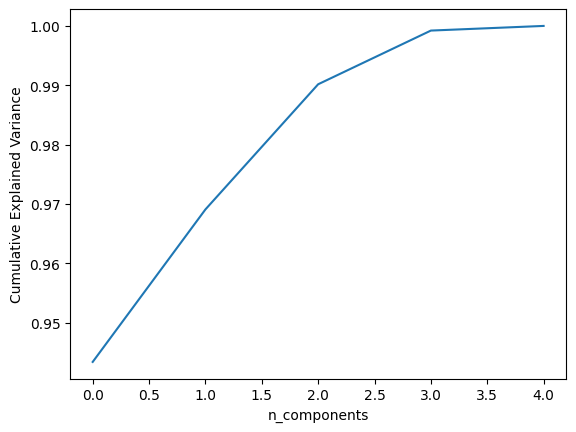

In [24]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')

In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [14]:
df.iloc[0:2]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0


In [17]:
df['Sample Question Papers Practiced'].value_counts()

6    1059
9    1051
3    1035
5    1028
8    1026
7     987
1     978
4     955
0     951
2     930
Name: Sample Question Papers Practiced, dtype: int64

In [18]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Hours Studied','Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']),
    ('categoric', cat_pipe(), ['Extracurricular Activities', ])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter = 50, n_jobs=-1, verbose=1, random_state = 42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.11492904603507054, 'algo__gamma': 3, 'algo__learning_rate': 0.4159126142111956, 'algo__max_depth': 4, 'algo__n_estimators': 195, 'algo__reg_alpha': 0.002424969074088043, 'algo__reg_lambda': 5.782199315538697, 'algo__subsample': 0.4987860105437612}
0.9887252577938058 0.9884483048372156 0.988912137126267


,feature,importance,stdev
1,Previous Scores,1.688535,0.016272
0,Hours Studied,0.299236,0.003370
3,Sleep Hours,0.003597,0.000096
4,Sample Question Papers Practiced,0.001699,0.000054
2,Extracurricular Activities,0.000527,0.000021


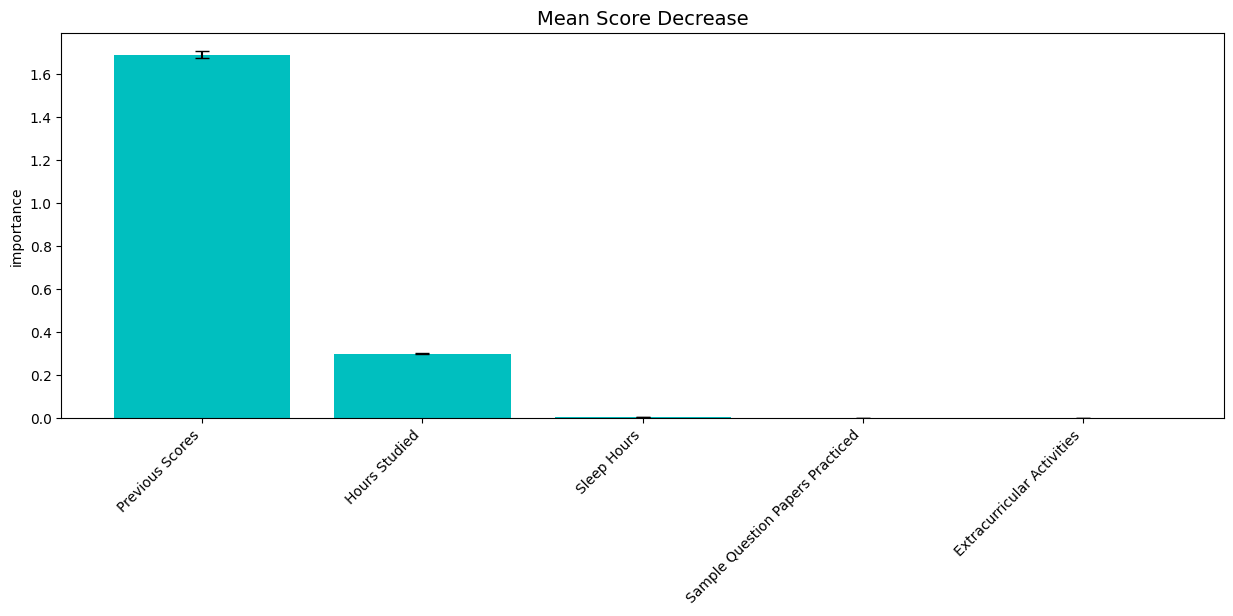

In [32]:
mean_score_decrease(X_train, y_train, model, plot=True)

#Predict

In [26]:
df.iloc[0:3]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0


In [33]:
data = [
    [7, 99, 1, 9, 1],
    [7, 50, 1, 9, 1]
]

X_pred = pd.DataFrame(data, index=[0,1], columns=X.columns)
X_pred

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,7,50,1,9,1


In [34]:
X_pred['Performance Index'] = model.predict(X_pred)
X_pred

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,92.241791
1,7,50,1,9,1,42.335705


#Result

Based from the dataset and model, Previous Scores has high causasion with Performance Index. The higher Previous Scores, the higher Performance Index.